In [ ]:
# this script plots a few evaluation outputs and the reference datasets

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc

#homemade function file
import importlib
import ppe_loading_functions #as functions
importlib.reload(ppe_loading_functions)
import ref_data_functions #as functions
importlib.reload(ref_data_functions)

from pylab import cm
import netCDF4
import numpy as np
from netCDF4 import Dataset

#HM
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn import preprocessing
from sklearn.model_selection import KFold, cross_val_score
import random

In [2]:
var1stPPE, results1stPPE,var2ndPPE, results2ndPPE, varMoreCloudParam, resultsMoreCloudParam,\
 varMoreCloudParam2, resultsMoreCloudParam2, varPhyDyn_NewParam_2tun,resultsPhyDyn_NewParam_2tun,\
 varPhyDyn_NewParam_5thPPE_2tun,results_5thPPE_2tun=\
ppe_loading_functions.load_all_ppes()

In [3]:
var1stPPE, results1stPPE_addivar,var2ndPPE, results2ndPPE_addivar, varMoreCloudParam, resultsMoreCloudParam_addivar,\
 varMoreCloudParam2, resultsMoreCloudParam2_addivar, varPhyDyn_NewParam_2tun,resultsPhyDyn_NewParam_2tun_addivar,\
 varPhyDyn_NewParam_5thPPE_2tun,results_5thPPE_2tun_addivar=\
ppe_loading_functions.load_addivar_ppes()

In [ ]:
indHighCl=np.where(resultsPhyDyn_NewParam_2tun[:,3]>61.92)[0]
indHighClHighSW=np.where(resultsPhyDyn_NewParam_2tun[indHighCl,0]>240)[0]
indHighClHighSWGighLW=np.where(-resultsPhyDyn_NewParam_2tun[indHighCl[indHighClHighSW],1]>238)[0]
indplot=indHighCl[indHighClHighSW[indHighClHighSWGighLW]]
indplot

array([ 4, 11, 31])

In [ ]:
name1stPPEini=r'ICON-A $PPE_1$'
name2ndPPEini=r'ICON-A $PPE_2$'
name1stPPEmore=r'ICON-A $PPE_3$'
name2ndPPEmore=r'ICON-A $PPE_4$'
selectedrun='selected run'

In [ ]:
### Paper results:
##### the selected simulations are the two first ones of indplot: 4, 11 from varPhyDyn_NewParam_2tun PPE
#selected tuned runs
selectedruns=indplot[:2]

labelspoints=['1st selected run','2nd selected run']#,'3rd run']

#2 close runs
closeruns=[14,39]


col=['c','r']
lww=['s','^']
titles=['a.','b.','c.','d.','e.']

# Validation

In [7]:
#load ref addi var ERA5, ERA-Interim, MERRA2, ICON-AES
ERA5_ts, ERA5_pr, ERA5_psl,ERA5_clivi=ref_data_functions.ref_addi_var_ERA5()
ERAInterim_ts, ERAInterim_pr, ERAInterim_psl, ERAInterim_clivi, ERAInterim_clwvi=ref_data_functions.ref_addi_var_ERAInterim()
merra2_ts, merra2_pr, merra2_psl, merra2_clivi, merra2_clwvi, merra2_hfss, merra2_hfls=ref_data_functions.MERRA2_validation()
icon_aes_ts, icon_aes_pr, icon_aes_psl, icon_aes_clivi, icon_aes_cllvi, icon_aes_hfss, icon_aes_hfls=ref_data_functions.icon_aes_validation()

In [8]:
jra_clwvi=np.mean(netCDF4.Dataset('REFERENCE_DATA/OBS6_JRA-25_reanaly_1_Amon_clwvi_1980-1989_fldmean_timavg.nc')['clwvi']) #in kg/m2
ESACCI_CLOUD1_clivi=np.mean(netCDF4.Dataset('REFERENCE_DATA/OBS_ESACCI-CLOUD_sat_AVHRR-fv3.0_Amon_clivi_1982-1991_fldmean_timavg.nc')['clivi']) #in kg/m2
ESACCI_CLOUD1_clwvi=np.mean(netCDF4.Dataset('REFERENCE_DATA/OBS_ESACCI-CLOUD_sat_AVHRR-fv3.0_Amon_clwvi_1982-1991_fldmean_timavg.nc')['clwvi']) #in kg/m2
#ESACCI_CLOUD2_clivi=np.mean(netCDF4.Dataset('REFERENCE_DATA/OBS_ESACCI-CLOUD_sat_AVHRR-AMPM-fv3.0_Amon_clivi_1982-1991_fldmean_timavg.nc')['clivi']) #in kg/m2
#ESACCI_CLOUD2_clwvi=np.mean(netCDF4.Dataset('REFERENCE_DATA/OBS_ESACCI-CLOUD_sat_AVHRR-AMPM-fv3.0_Amon_clwvi_1982-1991_fldmean_timavg.nc')['clwvi']) #in kg/m2

NOAA_CIRES_clwvi=np.mean(netCDF4.Dataset('REFERENCE_DATA/OBS6_NOAA-CIRES-20CR-V2_reanaly_v2_Amon_clwvi_1980-1989_fldmean_timavg.nc')['clwvi']) #in kg/m2


CLARA_AVHRR_clwvi1st=np.mean(netCDF4.Dataset('REFERENCE_DATA/OBS_CLARA-AVHRR_sat_V002_01_Amon_clwvi_1982-1984_fldmean_timavg.nc')['clwvi']) #in kg/m2
CLARA_AVHRR_clwvi2nd=np.mean(netCDF4.Dataset('REFERENCE_DATA/OBS_CLARA-AVHRR_sat_V002_01_Amon_clwvi_1986-1992_fldmean_timavg.nc')['clwvi']) #in kg/m2
CLARA_AVHRR_clwvi=CLARA_AVHRR_clwvi1st+CLARA_AVHRR_clwvi2nd

CLARA_AVHRR_clivi1st=np.mean(netCDF4.Dataset('REFERENCE_DATA/OBS_CLARA-AVHRR_sat_V002_01_Amon_clivi_1982-1984_fldmean_timavg.nc')['clivi']) #in kg/m2
CLARA_AVHRR_clivi2nd=np.mean(netCDF4.Dataset('REFERENCE_DATA/OBS_CLARA-AVHRR_sat_V002_01_Amon_clivi_1986-1992_fldmean_timavg.nc')['clivi']) #in kg/m2
CLARA_AVHRR_clivi=CLARA_AVHRR_clivi1st+CLARA_AVHRR_clivi2nd

MODIS_clivi=np.mean(netCDF4.Dataset('REFERENCE_DATA/OBS_MODIS_sat_MYD08-M3_Amon_clivi_2002-2011_fldmean_timavg.nc')['clivi']) #in kg/m2
MODIS_clwvi=np.mean(netCDF4.Dataset('REFERENCE_DATA/OBS_MODIS_sat_MYD08-M3_Amon_clwvi_2002-2011_fldmean_timavg.nc')['clwvi']) #in kg/m2



In [9]:
NCEP_NCAR_ts=np.mean(netCDF4.Dataset('REFERENCE_DATA/OBS6_NCEP-NCAR-R1_reanaly_1_Amon_ts_1980-1989_timavg_fldmean.nc')['ts'])-273.15 #in C
NCEP_NCAR_pr=np.mean(netCDF4.Dataset('REFERENCE_DATA/OBS6_NCEP-NCAR-R1_reanaly_1_Amon_pr_1980-1989_timavg_fldmean.nc')['pr'])*86400 #in mm/day
NCEP_NCAR_psl=np.mean(netCDF4.Dataset('REFERENCE_DATA/OBS6_NCEP-NCAR-R1_reanaly_1_Amon_psl_1980-1989_timavg_fldmean.nc')['psl']) #in Pa

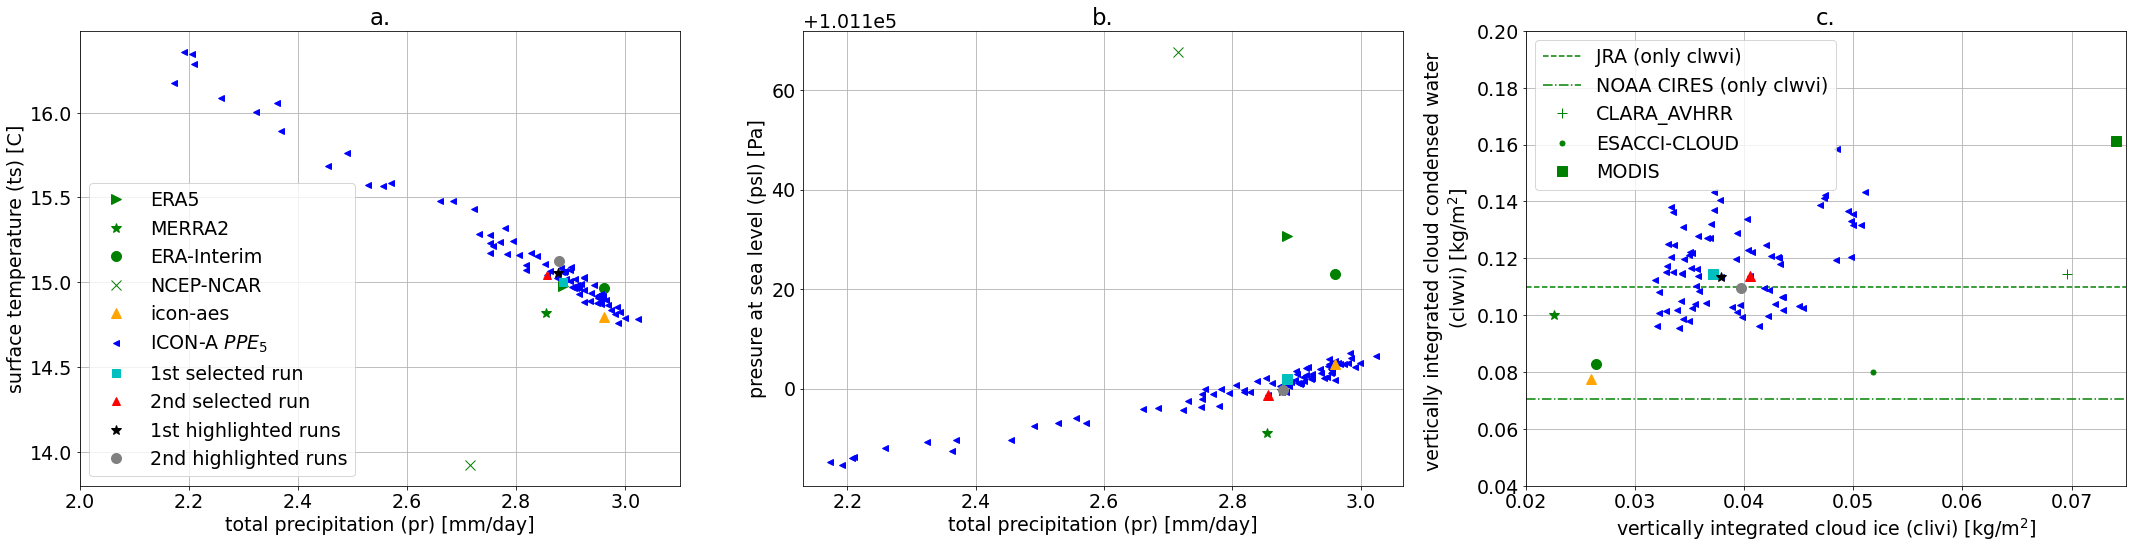

In [12]:
#plot other metrics

#Plot all Physics outputs against the Physics outputs 

cmap=plt.get_cmap("gist_rainbow")


#results=results_2ndPPE
#labelsoutputs=[r'total precipitation [mm/day]',r'surface temperature [C]',r'vertically integrated cloud ice (clivi) [g/m$^2$]',r'presure at sea level (psl) [hPa]',]

labelsoutputs=[r'total precipitation (pr) [mm/day]',r'surface temperature (ts) [C]',r'presure at sea level (psl) [Pa]',r'vertically integrated cloud ice (clivi) [kg/m$^2$]',\
                'vertically integrated cloud condensed water \n'+r'(clwvi) [kg/m$^2$]',r'sensible heat flux (hfss) [W/m$^2$]',r'latent heat flux (hfls) [W/m$^2$]']

FirstpartTitle='ICON PPE results,'


closeruns=[14,39]

Ntotparam=3
fig = plt.figure()
sizefont=19
plt.rc('font', size=sizefont) 
plt.rcParams["axes.labelsize"] = sizefont
plt.rcParams['figure.figsize'] = [30, 8]

ax = fig.add_subplot(1,3,1)

plt.plot(ERA5_pr, ERA5_ts,'>g',ms=10, label='ERA5')
plt.plot(merra2_pr, merra2_ts,'*g',ms=10, label='MERRA2')
plt.plot(ERAInterim_pr, ERAInterim_ts,'og',ms=10, label='ERA-Interim')
plt.plot(NCEP_NCAR_pr, NCEP_NCAR_ts,'xg',ms=10, label='NCEP-NCAR')
plt.plot(icon_aes_pr,icon_aes_ts,'^',color='orange',ms=10, label='icon-aes')
plt.plot(resultsPhyDyn_NewParam_2tun_addivar[:,0],resultsPhyDyn_NewParam_2tun_addivar[:,1],'<b',label=r'ICON-A $PPE_5$') 
plt.plot(results_5thPPE_2tun_addivar[:,0],results_5thPPE_2tun_addivar[:,1],'<b')
n=np.size(resultsPhyDyn_NewParam_2tun[:,1])
ii=0
for x in np.arange(0,n):
    if x in selectedruns:
        plt.plot(resultsPhyDyn_NewParam_2tun_addivar[x,0],resultsPhyDyn_NewParam_2tun_addivar[x,1],lww[ii],color=col[ii],ms=8,label=labelspoints[ii])
        ii+=1
plt.plot(resultsPhyDyn_NewParam_2tun_addivar[closeruns[0],0],resultsPhyDyn_NewParam_2tun_addivar[closeruns[0],1],'*k',ms=10,label='1st highlighted runs') #,label='ICON-A PhyDyn 4th PPE')
plt.plot(resultsPhyDyn_NewParam_2tun_addivar[closeruns[1],0],resultsPhyDyn_NewParam_2tun_addivar[closeruns[1],1],'o',color='gray',ms=10,label='2nd highlighted runs') #,label='ICON-A PhyDyn 4th PPE')

ax.set_title('a.')#ICON-A PPE results, targeted reference values for TOA LW and SW radiation')
ax.set_xlabel(labelsoutputs[0])
ax.set_ylabel(labelsoutputs[1])
ax.legend(loc="best")
ax.set_xlim([2,3.1])
#ax.set_ylim([13.5,16])
ax.grid()

ax = fig.add_subplot(1,3,2)
plt.plot(ERA5_pr,ERA5_psl,'>g',ms=10)
plt.plot(merra2_pr,merra2_psl,'*g',ms=10)
plt.plot(ERAInterim_pr,ERAInterim_psl,'og',ms=10)
plt.plot(NCEP_NCAR_pr, NCEP_NCAR_psl,'xg',ms=10)#, label='NCEP-NCAR')
plt.plot(icon_aes_pr,icon_aes_psl,'^',color='orange',ms=10)
plt.plot(resultsPhyDyn_NewParam_2tun_addivar[:,0],resultsPhyDyn_NewParam_2tun_addivar[:,2],'<b') #,label='ICON-A, Physics & Dyn. param. 1980-1990')
plt.plot(results_5thPPE_2tun_addivar[:,0],results_5thPPE_2tun_addivar[:,2],'<b') #,label='ICON-A PhyDyn 4th PPE')
plt.plot(resultsPhyDyn_NewParam_2tun_addivar[closeruns[0],0],resultsPhyDyn_NewParam_2tun_addivar[closeruns[0],2],'*k',ms=10)
plt.plot(resultsPhyDyn_NewParam_2tun_addivar[closeruns[1],0],resultsPhyDyn_NewParam_2tun_addivar[closeruns[1],2],'o',color='gray',ms=10)

Ns=1
ii=0
for x in np.arange(0,n):
    if x in selectedruns:
        plt.plot(resultsPhyDyn_NewParam_2tun_addivar[x,0],resultsPhyDyn_NewParam_2tun_addivar[x,2],lww[ii],color=col[ii],ms=10)#,label='ICON-A Dynamics param., 1980-1990')
        ii+=1

plt.plot(icon_aes_pr,icon_aes_psl,'^',color='orange',ms=10)
ax.set_title('b.')#ICON-A PPE results, targeted reference values for Cloud Cover and water vapor path')
ax.set_xlabel(labelsoutputs[0])
ax.set_ylabel(labelsoutputs[2])
#ax.set_xlim([21,28.5])
#ax.set_ylim([55,72])
ax.grid()


ax = fig.add_subplot(1,3,3)
xmin_=0.02
xmax_=0.075
#plt.plot(ERA5_pr, ERA5_ta,'>g',ms=10, label='ERA5')
plt.plot(merra2_clivi, merra2_clwvi,'*g',ms=10)
plt.plot(ERAInterim_clivi, ERAInterim_clwvi,'og',ms=10)
plt.hlines(y=jra_clwvi.data,xmin=xmin_, xmax=xmax_,color='g',linestyle='--',label='JRA (only clwvi)')
plt.hlines(y=NOAA_CIRES_clwvi.data,xmin=xmin_, xmax=xmax_,color='g',linestyle='-.',label='NOAA CIRES (only clwvi)')
plt.plot(CLARA_AVHRR_clivi, CLARA_AVHRR_clwvi,'+g',ms=10,label='CLARA_AVHRR')
plt.plot(ESACCI_CLOUD1_clivi,ESACCI_CLOUD1_clwvi,'.g',ms=10,label='ESACCI-CLOUD')
plt.plot(MODIS_clivi,MODIS_clwvi,'sg',ms=10,label='MODIS')
plt.plot(icon_aes_clivi,icon_aes_cllvi+icon_aes_clivi,'^',color='orange',ms=10)
plt.plot(resultsPhyDyn_NewParam_2tun_addivar[:,3],resultsPhyDyn_NewParam_2tun_addivar[:,4]+resultsPhyDyn_NewParam_2tun_addivar[:,3],'<b') 
plt.plot(results_5thPPE_2tun_addivar[:,3],results_5thPPE_2tun_addivar[:,4]+results_5thPPE_2tun_addivar[:,3],'<b')
n=np.size(resultsPhyDyn_NewParam_2tun[:,1])
ii=0

ii=0
for x in np.arange(0,n):
    if x in selectedruns:
        plt.plot(resultsPhyDyn_NewParam_2tun_addivar[x,3],resultsPhyDyn_NewParam_2tun_addivar[x,4]+resultsPhyDyn_NewParam_2tun_addivar[x,3],lww[ii],color=col[ii],ms=10)#,label='ICON-A Dynamics param., 1980-1990')
        ii+=1

plt.plot(resultsPhyDyn_NewParam_2tun_addivar[closeruns[0],3],resultsPhyDyn_NewParam_2tun_addivar[closeruns[0],4]+resultsPhyDyn_NewParam_2tun_addivar[closeruns[0],3],'*k',ms=10)
plt.plot(resultsPhyDyn_NewParam_2tun_addivar[closeruns[1],3],resultsPhyDyn_NewParam_2tun_addivar[closeruns[1],4]+resultsPhyDyn_NewParam_2tun_addivar[closeruns[1],3],'o',color='gray',ms=10)

ax.set_title('c.')#ICON-A PPE results, targeted reference values for TOA LW and SW radiation')
ax.set_xlabel(labelsoutputs[3])
ax.set_ylabel(labelsoutputs[4])
ax.set_xlim([xmin_,xmax_])
ax.set_ylim([0.04,0.2])
ax.legend(loc="best")

ax.grid()

fig.tight_layout()

plt.show()
#fig.savefig('PaperFig/Paper_PhyOutputs_PhyDynParam_validation_ts_pr_psl_clivi_cllvi.png')

In [14]:
print('ERA5_ts, merra2_ts, ERAInterim_ts, NCEP_NCAR_ts,icon_aes_ts = ',ERA5_ts, merra2_ts, ERAInterim_ts, NCEP_NCAR_ts,icon_aes_ts)
print('np.mean([ERA5_ts, merra2_ts, ERAInterim_ts, NCEP_NCAR_ts]) =',np.mean([ERA5_ts, merra2_ts, ERAInterim_ts, NCEP_NCAR_ts]))
print('np.std([ERA5_ts, merra2_ts, ERAInterim_ts, NCEP_NCAR_ts]) =', np.std([ERA5_ts, merra2_ts, ERAInterim_ts, NCEP_NCAR_ts]))
for x in np.arange(0,n):
    if x in selectedruns:
        print('resultsPhyDyn_NewParam_2tun_addivar[x,1] = ',resultsPhyDyn_NewParam_2tun_addivar[x,1])
        ii+=1
print('resultsPhyDyn_NewParam_2tun_addivar[closeruns[0],1],resultsPhyDyn_NewParam_2tun_addivar[closeruns[1],1]=',resultsPhyDyn_NewParam_2tun_addivar[closeruns[0],1],resultsPhyDyn_NewParam_2tun_addivar[closeruns[1],1])

ERA5_ts, merra2_ts, ERAInterim_ts, NCEP_NCAR_ts,icon_aes_ts =  14.978631591796898 14.818566894531273 14.968499755859398 13.920190429687523 14.794488525390648
np.mean([ERA5_ts, merra2_ts, ERAInterim_ts, NCEP_NCAR_ts]) = 14.671472167968773
np.std([ERA5_ts, merra2_ts, ERAInterim_ts, NCEP_NCAR_ts]) = 0.43835870256900966
resultsPhyDyn_NewParam_2tun_addivar[x,1] =  15.0018
resultsPhyDyn_NewParam_2tun_addivar[x,1] =  15.0444
resultsPhyDyn_NewParam_2tun_addivar[closeruns[0],1],resultsPhyDyn_NewParam_2tun_addivar[closeruns[1],1]= 15.0561 15.1245
